In [1]:
import sys
from pycocotools.coco import COCO
import nltk
nltk.download('punkt')
from raw_program.data_loader import get_loader
from torchvision import transforms

COCOAPIROOT = r"D:\学习资料\实验室"

# Define a transform to pre-process the training images.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Set the minimum word count threshold.
vocab_threshold = 5

# Specify the batch size.
batch_size = 10

# Obtain the data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=False,
                         cocoapi_loc=COCOAPIROOT)

[nltk_data] Error loading punkt: [WinError 10060]
[nltk_data]     由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。
D:\python\anaconda\envs\PyTorch\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'D:\python\anaconda\envs\PyTorch\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


loading annotations into memory...
Done (t=1.14s)
creating index...
index created!
[0/591753] 正在读取captions并根据其分词建立词典...
[100000/591753] 正在读取captions并根据其分词建立词典...
[200000/591753] 正在读取captions并根据其分词建立词典...
[300000/591753] 正在读取captions并根据其分词建立词典...
[400000/591753] 正在读取captions并根据其分词建立词典...
[500000/591753] 正在读取captions并根据其分词建立词典...
初始化vocab.pkl文件成功
loading annotations into memory...
Done (t=1.22s)
creating index...
index created!
正在对caption分词...


100%|████████████████████████████████████████████████████████████████████████| 591753/591753 [01:05<00:00, 9022.19it/s]


In [2]:
sample_caption = 'A person doing a trick on a rail while riding a skateboard.'

In [3]:
import nltk

sample_tokens = nltk.tokenize.word_tokenize(str(sample_caption).lower())
print(sample_tokens)

['a', 'person', 'doing', 'a', 'trick', 'on', 'a', 'rail', 'while', 'riding', 'a', 'skateboard', '.']


In [4]:
sample_caption = []

start_word = data_loader.dataset.vocab.start_word
print('Special start word:', start_word)
sample_caption.append(data_loader.dataset.vocab(start_word))
print(sample_caption)

Special start word: <start>
[0]


In [5]:
sample_caption.extend([data_loader.dataset.vocab(token) for token in sample_tokens])
print(sample_caption)

[0, 3, 145, 495, 3, 727, 49, 3, 681, 265, 106, 3, 147, 12]


In [6]:
end_word = data_loader.dataset.vocab.end_word
print('Special end word:', end_word)

sample_caption.append(data_loader.dataset.vocab(end_word))
print(sample_caption)

Special end word: <end>
[0, 3, 145, 495, 3, 727, 49, 3, 681, 265, 106, 3, 147, 12, 1]


In [7]:
# Preview the word2idx dictionary.
dict(list(data_loader.dataset.vocab.word2idx.items())[:10])

{'<start>': 0,
 '<end>': 1,
 '<unk>': 2,
 'a': 3,
 'bicycle': 4,
 'replica': 5,
 'with': 6,
 'clock': 7,
 'as': 8,
 'the': 9}

In [8]:
# Print the total number of keys in the word2idx dictionary.
print('Total number of tokens in vocabulary:', len(data_loader.dataset.vocab))

Total number of tokens in vocabulary: 10321


In [9]:
from collections import Counter

# Tally the total number of training captions with each length.
counter = Counter(data_loader.dataset.caption_lengths)
lengths = sorted(counter.items(), key=lambda pair: pair[1], reverse=True)
for value, count in lengths:
    print('value: %2d --- count: %5d' % (value, count))

value: 10 --- count: 123316
value: 11 --- count: 114543
value:  9 --- count: 102606
value: 12 --- count: 82271
value: 13 --- count: 53723
value: 14 --- count: 31924
value:  8 --- count: 29696
value: 15 --- count: 18511
value: 16 --- count: 11022
value: 17 --- count:  6928
value: 18 --- count:  4382
value: 19 --- count:  2890
value:  7 --- count:  2297
value: 20 --- count:  2047
value: 21 --- count:  1443
value: 22 --- count:   978
value: 23 --- count:   746
value: 24 --- count:   563
value: 25 --- count:   390
value: 26 --- count:   287
value: 27 --- count:   212
value: 28 --- count:   162
value: 29 --- count:   124
value: 30 --- count:    92
value: 31 --- count:    80
value: 32 --- count:    61
value: 34 --- count:    51
value: 33 --- count:    45
value: 37 --- count:    43
value: 35 --- count:    42
value: 36 --- count:    32
value: 38 --- count:    27
value: 39 --- count:    25
value: 43 --- count:    23
value: 44 --- count:    21
value: 40 --- count:    18
value: 45 --- count:    1

C:\Windows\Temp\ipykernel_16860\3723021540.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lengths, kde=False, bins=20)


<AxesSubplot:>

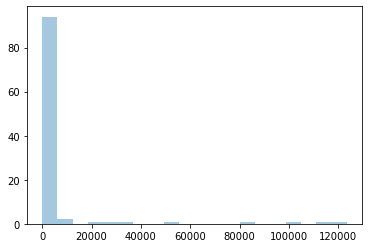

In [10]:
import seaborn as sns

sns.distplot(lengths, kde=False, bins=20)

In [11]:
import numpy as np
import torch.utils.data as data

indices = data_loader.dataset.get_train_indices()
print('sampled indices:', indices)

new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
data_loader.batch_sampler.sampler = new_sampler
    
images, captions = next(iter(data_loader))
    
print('images.shape:', images.shape)
print('captions.shape:', captions.shape)

sampled indices: [93881, 561292, 196110, 184093, 35108, 532545, 248913, 42386, 161362, 135127]
images.shape: torch.Size([10, 3, 224, 224])
captions.shape: torch.Size([10, 13])
